# 지표간의 상관계수와 히트맵 🌡

늘 상승하는 시장의 주식을 고르면 좋겠지만 현실을 그렇지 않다.

그래서 주식을 고를때는 서로의 등락을 어느정도 상쇄시켜주는 주식들을 고르는 것이 변동성을 낮추는데 도움이 된다.

## 지표 살펴보기

In [9]:
import pandas as pd
import numpy as np
from coredotfinance.data import KrxReader

krx = KrxReader()
df = krx.read_date('2021-08-02', kind='index')
df

,index_name,close,change,change_ratio,open,high,low,volume,trading_value,market_cap
0,KRX 300,1937.99,13.82,0.72,1934.49,1937.99,1920.12,160613542,9631867653031,2130861690225350
1,KTOP 30,11887.85,88.57,0.75,11859.16,11887.85,11749.46,30790493,3689096937046,1208044903694060
2,KRX 100,6721.11,56.02,0.84,6702.19,6721.11,6652.51,64494351,6341746338998,1751589413095060
3,KRX Mid 200,1908.97,7.25,0.38,1906.34,1913.26,1897.41,108389473,1567910094438,107902827160199
4,KRX 자동차,2362.33,25.16,1.08,2350.73,2368.11,2339.75,5780039,437656921120,136803810973990
5,KRX 반도체,3905.20,79.70,2.08,3848.94,3915.70,3837.55,16300818,902121666728,121734655963780
6,KRX 헬스케어,4460.51,121.91,2.81,4358.23,4460.51,4358.23,34156435,2225796410255,235534448310795
7,KRX 은행,739.36,-7.33,-0.98,746.82,747.85,734.56,8360049,199809388970,74972654857950
8,KRX 에너지화학,4018.54,22.57,0.56,4009.57,4019.13,3945.81,12675504,1124443610944,174341679156100
9,KRX 철강,2107.57,-26.10,-1.22,2154.54,2156.11,2091.51,9606389,293657122116,57210958943800


`KRX 300 필수소비재`와  `KRX 필수소비재`는 똑같은 지표의 특성을 공유할 것이다.

`KRX 300금융`과 `KRX 증권` 또한 같은 지표의 특성을 공유할 것이다.

따라서 `index_name`에 숫자가 들어가 있는 지표들은 상관계수 계산에서 제외하자.

In [38]:
import re

regx = re.compile('[0-9]')

index_names = [i for i in df['index_name'] if re.search(regx, i) is None]
index_names

['KRX 자동차',
 'KRX 반도체',
 'KRX 헬스케어',
 'KRX 은행',
 'KRX 에너지화학',
 'KRX 철강',
 'KRX 방송통신',
 'KRX 건설',
 'KRX 증권',
 'KRX 기계장비',
 'KRX 보험',
 'KRX 운송',
 'KRX 경기소비재',
 'KRX 필수소비재',
 'KRX 미디어&엔터테인먼트',
 'KRX 정보기술',
 'KRX 유틸리티']

## 지표의 데이터

그 다음 위 지표들의 최근 3개월간의 데이터를 read 함수를 이용해서 모아보자.

주식간의 상관관계는 등락률을 기준으로 볼 것이기 때문에 이에 `change_ratio` column의 데이터만 모은다

In [43]:
index_data = []

for symbol in index_names:
    data = krx.read(symbol=symbol, start = '2021-04-01', end = '2021-07-01', kind='index')
    index_data.append(data['change_ratio'].to_list())

KRX 자동차
KRX 반도체
KRX 헬스케어
KRX 은행
KRX 에너지화학
KRX 철강
KRX 방송통신
KRX 건설
KRX 증권
KRX 기계장비
KRX 보험
KRX 운송
KRX 경기소비재
KRX 필수소비재
KRX 미디어&엔터테인먼트
KRX 정보기술
KRX 유틸리티


## 상관계수 corr

`DataFrame`에 있는 `corr`를 사용해서 상관관계 계수를 얻어본다. 

`method`는 `pearson` 방식을 사용한다.

In [44]:
stock_data = pd.DataFrame(index_data).T
stock_data.columns = index_names
corr = stock_data.corr(method='pearson')

## 히트맵 using seaborn

plt의 font는 unicode를 인식하지 못한다.

따라서 unicode를 인식하는 폰트로 설정해줘야 한글이 깨지지 않는다.

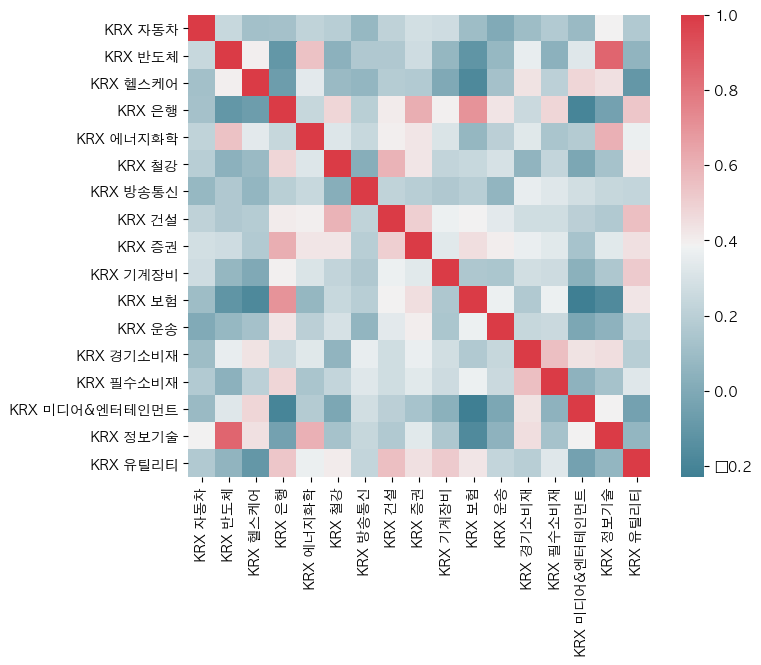

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'AppleGothic'
f, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

상관계수는 +1에 가까울수록 변동성(change_ratio)가 비슷하고 -1에 가까울수록 변동성이 반대로 움직임을 의미한다.

상관계수에 의해서 포트폴리오를 구성해본다면 반도체와 미디어&엔터테인먼트를 함께 구성하는것은 효율적이지 못하다.

그보다는 반도체와 은행을 함께 구성하는 것이 효율적이다.